loading dataset...
...dataset loaded
starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized


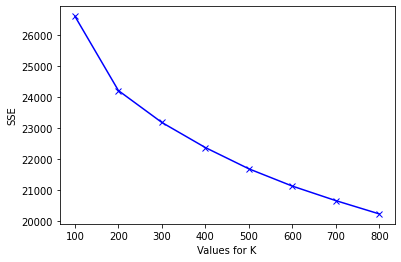

In [8]:
import  numpy as np
from sklearn.cluster import KMeans
from KmeanClustering import Kmeanclustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

sse={}
X,df = Kmeanclustering.main()

for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=600).fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()), 'bx-')
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [9]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100)
vectoriser.fit_transform(df)

kmeans = KMeans(n_clusters=200)
kmeans.fit(X)
result = pd.concat([df,pd.DataFrame(X.toarray(),columns=vectoriser.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X)

/home/annabelle/Documents/Advanced_Machine_Learning_Project/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
result[['text', 'cluster']]

,text,cluster
0,go to watch some more home video,122
1,tire from the shoot even though it was not eve...,60
2,to littl ladi gard party..so happi she's home ...,42
3,i definit got it bad today ..,147
4,i had an awesom weekend! i love my peep from s...,107
...,...,...
49995,usr i am make this a bounc friday head out of ...,188
49996,happi mother day to all mom out there.,85
49997,usr it was gonna be hilarious!,10
49998,boyfriend just called..yay!!,61


In [17]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Name' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [19]:
result_labelled[['text', 'cluster', 'label']]

,text,cluster,label
0,go to watch some more home video,122,text home
1,tire from the shoot even though it was not eve...,60,text off
2,to littl ladi gard party..so happi she's home ...,42,text home
3,i definit got it bad today ..,147,text got
4,i had an awesom weekend! i love my peep from s...,107,text from my
...,...,...,...
49995,usr i am make this a bounc friday head out of ...,188,text of out
49996,happi mother day to all mom out there.,85,text there
49997,usr it was gonna be hilarious!,10,text it was
49998,boyfriend just called..yay!!,61,text just
